In [1]:
import cobra
from eflux.eflux2 import add_slack_variables_to_model, get_condition_specific_upper_bounds, get_normalized_condition
from eflux.utils import get_max_flux_bounds
import pandas as pd
import numpy as np

In [13]:
dir(eflux2)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_slack_variables_to_model',
 'cobra',
 'get_condition_specific_upper_bounds',
 'get_normalized_condition',
 'np',
 'pd',
 'run_condition_specific_eflux']

# Data

In [4]:
ls ../data/circadian_experiments/processed_data

cleaned_enzyme_activity.csv          normalized_sucrose_metabolomics.csv
normalized_enzyme_activity.csv       sucrose_metabolomics.csv*


In [4]:
enzyme_activity = pd.read_csv('../data/circadian_experiments/processed_data/normalized_enzyme_activity.csv', index_col='Reaction_ID')
reference_condition = 'L_T16_B'
model = cobra.io.load_json_model('../models/syn_elong_flipped_no_zero.json')
model.reactions.BIOMASS__1.lower_bound = 0.01
model.reactions.EX_sucr_e.lower_bound = 0.0
model.objective = 'EX_sucr_e'
model.optimize()


,fluxes,reduced_costs
ADPT,5.600054e-06,0.000000e+00
O2tcx,1.008651e-01,0.000000e+00
DNTPPA,4.111838e-06,0.000000e+00
DTMPK,2.847819e-04,0.000000e+00
BIOMASS__1,5.390524e-02,-3.552714e-13
...,...,...
Ktu,8.339140e-08,0.000000e+00
SUCRt2,6.288309e-01,0.000000e+00
3OAR40_1,2.186385e-02,-5.861978e-14
AOOA,4.626713e-03,0.000000e+00


In [5]:
positive_lb = {rxn.id: rxn.lower_bound for rxn in model.reactions if rxn.lower_bound > 0}
positive_lb

{'BIOMASS__1': 0.01}

# Compute Flux variability analysis to get  upper bounds

In [6]:
fva_upper_bounds = get_max_flux_bounds(model, rxn_list = [])#['EX_sucr_e', 'EX_photon650_e', 'EX_photon690_e', 'EX_co2_e', 'BIOMASS__1'])
fva_upper_bounds

Restricted license - for non-production use only - expires 2025-11-24
Read LP format model from file /var/folders/wh/dbqlj3hs42j4p1stxnyzbjn40000gn/T/tmpngfmkgzv.lp
Reading time = 0.01 seconds
: 928 rows, 1067 columns, 5025 nonzeros
Restricted license - for non-production use only - expires 2025-11-24
Read LP format model from file /var/folders/wh/dbqlj3hs42j4p1stxnyzbjn40000gn/T/tmptaxqn1aa.lp
Reading time = 0.01 seconds
: 928 rows, 1067 columns, 5025 nonzeros
Restricted license - for non-production use only - expires 2025-11-24
Read LP format model from file /var/folders/wh/dbqlj3hs42j4p1stxnyzbjn40000gn/T/tmpv9_biv8m.lp
Reading time = 0.01 seconds
: 928 rows, 1067 columns, 5025 nonzeros
Restricted license - for non-production use only - expires 2025-11-24
Read LP format model from file /var/folders/wh/dbqlj3hs42j4p1stxnyzbjn40000gn/T/tmpf310ny68.lp
Reading time = 0.01 seconds
: 928 rows, 1067 columns, 5025 nonzeros
Restricted license - for non-production use only - expires 2025-11-2

{'ADPT': 5.6e-06,
 'O2tcx': 0.100865121,
 'DNTPPA': 4.112e-06,
 'DTMPK': 0.000284782,
 'BIOMASS__1': 0.053905239,
 '5DOAN': 5.6e-06,
 '3HAD160': 0.020833187,
 'RNDR3': 0.000354102,
 'Htex': 9.386794412,
 'G5SD': 0.025293432,
 'HISTDa': 0.004626713,
 'TRPS3': 0.003852379,
 'DMBZIDS2': 2.76e-07,
 'ORNDC': 2.207e-06,
 'U23GAAT2': 0.000514625,
 'HOXGfx': 0.000247643,
 'PGK': 19.528476979,
 'IMPD': 0.005649153,
 'LPOR': 0.0005384,
 'CHRPL': 9.62e-07,
 'GCALDDy': 4.112e-06,
 'MSBENZMT': 9.62e-07,
 'DESAT18a': 0.00525969,
 'FUM': 0.031924687,
 'PHYFXOR': 0.000247643,
 'TMPPP_1': 1.366e-06,
 'RNDR1': 0.000284782,
 'GLYCL': 0.051528109,
 'ACONT': 0.06296413,
 'NDPK7': 0.000354102,
 'GTPCI': 4.112e-06,
 'AIRC2': 0.010207248,
 'IGPS': 0.003852379,
 'DHORD3um': 0.010182018,
 'MTHFC': 0.025042574,
 'HBZNPT': 9.62e-07,
 'HISTDb': 0.004626713,
 'UPPDC1': 0.000786043,
 'GARFT': 0.010208614,
 'H4THDPR': 0.012879216,
 'UDPG4E': 0.002271407,
 'GLCS3': 0.027693584,
 'AICART': 0.01483396,
 'PRAGSr': 0.0102

# Compute condition-specific upper bounds

In [7]:
condition_specific_upper_bounds = {condition: get_condition_specific_upper_bounds(fva_upper_bounds, enzyme_activity[condition].dropna().to_dict())
                                   for condition in enzyme_activity}
condition_specific_models = {condition: add_slack_variables_to_model(model, upper_bounds)
                            for condition, upper_bounds in condition_specific_upper_bounds.items()}

condition_specific_fluxes = pd.DataFrame({condition: condition_specific_model.optimize().fluxes
                             for condition, condition_specific_model in condition_specific_models.items()
                            })
    

Read LP format model from file /var/folders/wh/dbqlj3hs42j4p1stxnyzbjn40000gn/T/tmppnwf44e0.lp
Reading time = 0.01 seconds
: 927 rows, 1066 columns, 5022 nonzeros
Read LP format model from file /var/folders/wh/dbqlj3hs42j4p1stxnyzbjn40000gn/T/tmp0omws4m1.lp
Reading time = 0.01 seconds
: 927 rows, 1066 columns, 5022 nonzeros
Read LP format model from file /var/folders/wh/dbqlj3hs42j4p1stxnyzbjn40000gn/T/tmp2n2h3llx.lp
Reading time = 0.01 seconds
: 927 rows, 1066 columns, 5022 nonzeros
Read LP format model from file /var/folders/wh/dbqlj3hs42j4p1stxnyzbjn40000gn/T/tmpoaejjvt8.lp
Reading time = 0.01 seconds
: 927 rows, 1066 columns, 5022 nonzeros
Read LP format model from file /var/folders/wh/dbqlj3hs42j4p1stxnyzbjn40000gn/T/tmp6eqolkqj.lp
Reading time = 0.01 seconds
: 927 rows, 1066 columns, 5022 nonzeros
Read LP format model from file /var/folders/wh/dbqlj3hs42j4p1stxnyzbjn40000gn/T/tmpsnn90_rq.lp
Reading time = 0.01 seconds
: 927 rows, 1066 columns, 5022 nonzeros
Read LP format model f

<Axes: ylabel='Density'>

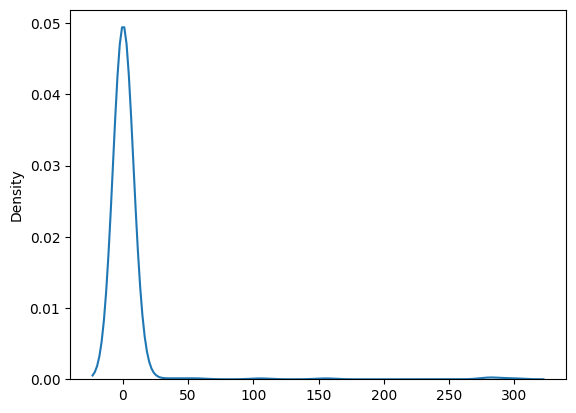

In [78]:
import seaborn as sns
sns.kdeplot(condition_specific_upper_bounds['D_T2_A'])


<Axes: ylabel='Density'>

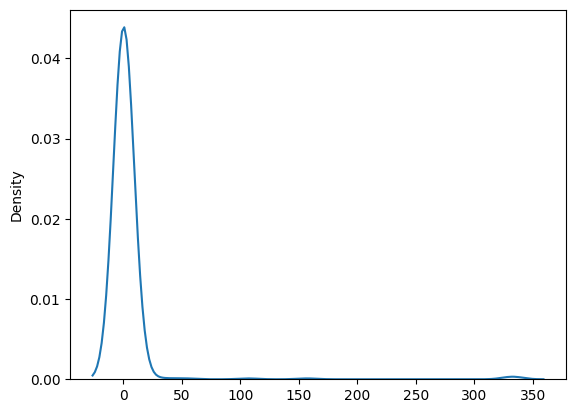

In [79]:
sns.kdeplot(condition_specific_upper_bounds['D_T2_B'])


In [ ]:
sns.kdeplot(condition_specific_upper_bounds['D_T2_C'])


In [13]:
fluxes = condition_specific_fluxes 
fluxes.to_csv('../data/circadian_experiments/processed_data/enzyme_constrained_fluxes.csv')

In [11]:
fluxes.iloc[:,15:]

,L_T16_A,L_T16_B,L_T16_C,D_T0_A,D_T0_B,D_T0_C,D_T2_A,D_T2_B,D_T2_C,D_T4_A,D_T4_B,D_T4_C,D_T8_A,D_T8_B,D_T8_C
ADPT,2.873172e-06,5.600053e-06,2.386290e-06,1.038870e-06,1.038870e-06,1.038870e-06,1.058924e-06,1.038870e-06,1.038870e-06,1.038870e-06,1.038870e-06,1.038870e-06,2.358969e-06,1.763106e-06,1.452565e-06
O2tcx,5.175002e-02,1.008651e-01,4.298076e-02,1.464099e-02,1.645177e-02,1.563378e-02,1.907308e-02,1.871085e-02,1.871156e-02,1.871156e-02,1.871085e-02,1.871120e-02,4.248959e-02,3.175610e-02,2.616282e-02
DNTPPA,2.109626e-06,4.111838e-06,1.752133e-06,7.627900e-07,7.627900e-07,7.627900e-07,7.775147e-07,7.627900e-07,7.627900e-07,7.627900e-07,7.627900e-07,7.627900e-07,1.732072e-06,1.294560e-06,1.066546e-06
DTMPK,1.461107e-04,2.847819e-04,1.213510e-04,5.283010e-05,5.283010e-05,5.283010e-05,5.384992e-05,5.283010e-05,5.283010e-05,5.283010e-05,5.283010e-05,5.283010e-05,1.199617e-04,8.965996e-05,7.386793e-05
BIOMASS__1,2.765671e-02,5.390524e-02,2.297005e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.019304e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,2.270707e-02,1.697138e-02,1.398217e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ktu,4.278492e-08,8.339140e-08,3.553467e-08,1.547000e-08,1.547000e-08,1.547000e-08,1.576863e-08,1.547000e-08,1.547000e-08,1.547000e-08,1.547000e-08,1.547000e-08,3.512784e-08,2.625472e-08,2.163041e-08
SUCRt2,3.226289e-01,6.288309e-01,2.679584e-01,8.324266e-02,9.810606e-02,9.139181e-02,1.189091e-01,1.166493e-01,1.166549e-01,1.166549e-01,1.166493e-01,1.166522e-01,2.648977e-01,1.979794e-01,1.631088e-01
3OAR40_1,1.121750e-02,2.186385e-02,9.316603e-03,4.055978e-03,4.055978e-03,4.055978e-03,4.134274e-03,4.055978e-03,4.055978e-03,4.055978e-03,4.055978e-03,4.055978e-03,9.209938e-03,6.883554e-03,5.671137e-03
AOOA,2.373788e-03,4.626712e-03,1.971531e-03,8.583048e-04,8.583048e-04,8.583048e-04,8.748733e-04,8.583048e-04,8.583048e-04,8.583048e-04,8.583048e-04,8.583048e-04,1.948959e-03,1.456662e-03,1.200096e-03


In [16]:
fluxes[fluxes['L_T16_B'] ==0 ]['L_T16_B']

H2Otex      0.0
PSP_L       0.0
PGCD        0.0
PSERT       0.0
NTRIRfx     0.0
NTRARf2     0.0
NO3tex      0.0
NO3abcpp    0.0
EX_h2o_e    0.0
EX_no3_e    0.0
Name: L_T16_B, dtype: float64

In [74]:
pd.DataFrame.from_dict(condition_specific_upper_bounds)[['D_T2_A', 'D_T2_B', 'D_T2_C']]

,D_T2_A,D_T2_B,D_T2_C
DTMPK,3.321803e-04,2.676751e-04,2.468092e-04
3HAD160,2.654626e-02,2.256438e-02,8.322176e-03
RNDR3,2.079492e-04,1.831132e-04,2.538455e-04
G5SD,3.191389e-02,3.370433e-02,2.996462e-02
HISTDa,7.337544e-03,6.762987e-03,6.790779e-03
...,...,...,...
GHMT2r,4.062505e-02,3.421015e-02,4.204700e-02
ILETA,1.586680e-02,1.317647e-02,1.946405e-02
VALTA,1.703475e-02,1.414639e-02,2.089680e-02
TYRTA,9.336209e-03,8.626088e-03,8.328081e-03


In [68]:
bounds = {r.name: r.dual for r in  condition_specific_models['D_T2_A'].constraints}
variables = {r.name: r.primal for r in condition_specific_models['D_T2_A'].variables if 'SLACK' in r.name}
variables

{'SLACK_DTMPK': 0.0,
 'SLACK_3HAD160': 0.0,
 'SLACK_RNDR3': 0.0,
 'SLACK_G5SD': 0.0,
 'SLACK_HISTDa': 0.0,
 'SLACK_TRPS3': 0.0,
 'SLACK_DMBZIDS2': -1.794293121951838e-07,
 'SLACK_ORNDC': -2.6212705938506173e-06,
 'SLACK_U23GAAT2': 0.0,
 'SLACK_HOXGfx': 0.0,
 'SLACK_PGK': 0.0,
 'SLACK_IMPD': 0.0,
 'SLACK_LPOR': 0.0,
 'SLACK_CHRPL': -8.721501520082613e-07,
 'SLACK_GCALDDy': -3.2872288534253672e-06,
 'SLACK_MSBENZMT': -1.205998336987002e-06,
 'SLACK_DESAT18a': 0.0,
 'SLACK_FUM': 0.0,
 'SLACK_PHYFXOR': 0.0,
 'SLACK_TMPPP_1': -1.0714615406905318e-06,
 'SLACK_RNDR1': 0.0,
 'SLACK_GLYCL': 0.0,
 'SLACK_ACONT': 0.0,
 'SLACK_NDPK7': 0.0,
 'SLACK_GTPCI': -4.651650170459614e-06,
 'SLACK_AIRC2': 0.0,
 'SLACK_IGPS': 0.0,
 'SLACK_DHORD3um': 0.0,
 'SLACK_MTHFC': 0.0,
 'SLACK_HBZNPT': -4.916250503093762e-07,
 'SLACK_HISTDb': 0.0,
 'SLACK_UPPDC1': 0.0,
 'SLACK_GARFT': 0.0,
 'SLACK_H4THDPR': 0.0,
 'SLACK_UDPG4E': 0.0,
 'SLACK_GLCS3': 0.0,
 'SLACK_AICART': 0.0,
 'SLACK_PRAGSr': 0.0,
 'SLACK_UDCPDPS': -4.8